In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
path_to_folder = "Semester_3/ENPM700/ENPM700_midterm_project"
%cd /content/drive/My\ Drive/{path_to_folder}

Mounted at /content/drive/
/content/drive/My Drive/Semester_3/ENPM700/ENPM700_midterm_project


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt


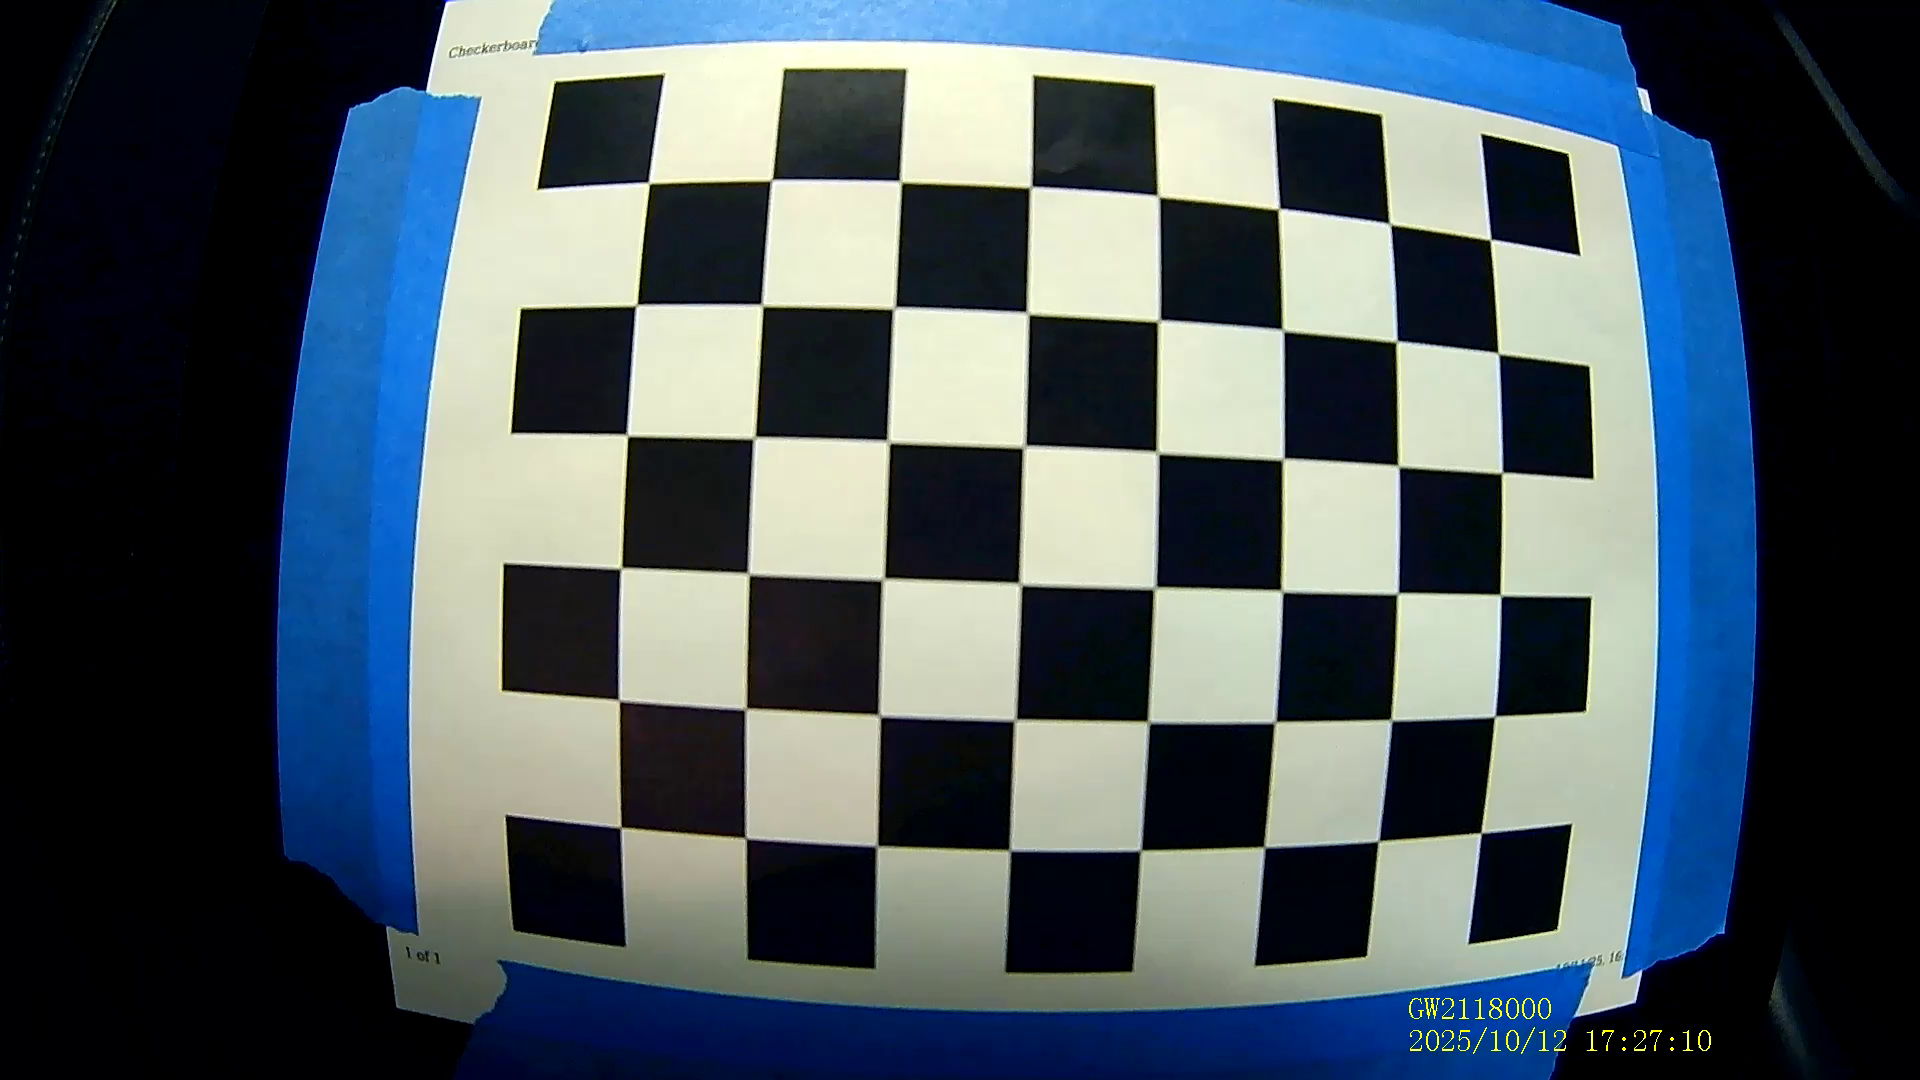

In [3]:
capture = cv2.VideoCapture('checkerboard.MOV')
ret, frame = capture.read()
image_h, image_w, _ = frame.shape
cv2_imshow(frame)


In [4]:
#THIS CODE JUST CLIPS THE VIDEO SO IT DOESNT NEED TO RUN SO MANY FRAMES


# i = 0
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# checkerboard_clipped = cv2.VideoWriter('checkerboard_clipped.mp4', fourcc, 25.0,(image_w, image_h))
# while True:
#   ret, frame = capture.read()
#   if not ret:
#     break
#   i+=1
#   if i%10==0:
#     checkerboard_clipped.write(frame)


# capture.release()
# checkerboard_clipped.release()

In [5]:
# Find chessboard points in each image

# Termination criteria: maximum 30 iterations, error threshold 0.001
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Initialize object points to be added to list
objp = np.zeros((8*6,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Initialize object points and image points list
objpoints = [] # 3D coordinates of point on checkerboard
imgpoints = [] # 2D coordinates of points on image

# # Find chessboard corners for each image
# for i in range(0,50):
#   image = images[i].copy()
#   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#   # Find chessboard corners, additional flags for adaptive thresholding and normalizing image brightness and contrast
#   ret, corners = cv2.findChessboardCorners(gray, (10,7), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE)


#   if ret == True: # If all corners found:
#     objpoints.append(objp) # Add corner 3D coordinates to object points list
#     corners2 = cv2.cornerSubPix(gray, corners, (5,5), (-1,-1), criteria) # Refine 2D corner locations
#     imgpoints.append(corners2) # Add 2D corner locations to list




In [6]:
capture = cv2.VideoCapture('checkerboard_clipped.mp4')
ret, frame = capture.read()
image_h, image_w, _ = frame.shape


while True:
  ret, frame = capture.read()
  if not ret:
    break
  image = frame.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  ret2, corners = cv2.findChessboardCorners(gray, (8,6), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE)
  if ret2 == True:
    objpoints.append(objp)  # Add corner 3D coordinates to object points list
    corners2 = cv2.cornerSubPix(gray, corners, (5,5), (-1,-1), criteria) # Refine 2D corner locations
    imgpoints.append(corners2) # Add 2D corner locations to list


# Camera calibration
# Return camera matrix, distortion coefficients, rotation vectors, and translation vectors
# Matrix is of intrinsic parameters and does not depend on the scene being viewed
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print(mtx)
print(dist)
print(rvecs)
print(tvecs)


[[1.15241931e+03 0.00000000e+00 9.64831959e+02]
 [0.00000000e+00 1.16177926e+03 5.31278521e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.44425733  0.28503192 -0.00137923  0.00075434 -0.11552678]]
(array([[-0.0497614 ],
       [-0.03521321],
       [ 0.02599922]]), array([[-0.05307858],
       [-0.02610176],
       [ 0.02234968]]), array([[-0.06122335],
       [-0.04615575],
       [ 0.0179136 ]]), array([[-0.06157039],
       [-0.02890904],
       [ 0.02127107]]), array([[-0.06566942],
       [-0.03131156],
       [ 0.019699  ]]), array([[-0.06670685],
       [-0.03348353],
       [ 0.02155586]]), array([[-0.07686792],
       [-0.03351277],
       [ 0.01669264]]), array([[-0.05607705],
       [-0.02613654],
       [ 0.02295504]]), array([[-0.05353968],
       [-0.02736753],
       [ 0.02361938]]), array([[-0.04425396],
       [-0.0396546 ],
       [ 0.0355769 ]]), array([[-0.03992699],
       [-0.03121617],
       [ 0.0250756 ]]), array([[-0.03402988],
       [-0.0246725 ]

In [7]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
undistorted = cv2.VideoWriter('undistorted.mp4', fourcc, 25.0,(image_w, image_h))
capture = cv2.VideoCapture('checkerboard_clipped.mp4')
ret, frame = capture.read()
while True:
  ret, frame = capture.read()
  if not ret:
    break
  image = frame.copy()
  newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (image_w,image_h), 0, (image_w,image_h))
  dst = cv2.undistort(image, mtx, dist, None, newcameramtx)
  undistorted.write(dst)
capture.release()
undistorted.release()


KeyboardInterrupt: 

In [ ]:
#Undistort an image
frame = cv2.imread('frame_at_3_44.jpg')
image = frame.copy()
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (image_w,image_h), 0, (image_w,image_h))
dst = cv2.undistort(image, mtx, dist, None, newcameramtx)
cv2_imshow(dst)
cv2.imwrite('undistorted_3_44.jpg', dst)